## 一、数据预处理

### 1.1、转换数据格式


In [13]:
import os
import json
import tqdm
import shutil

root = "./trainning set"
save_root = "./icpr2024"
os.makedirs(os.path.join(save_root, "img"), exist_ok=True)

with open(os.path.join(save_root, "img_src.txt"), 'w', encoding='utf-8') as fw:
    for file in tqdm.tqdm(os.listdir(os.path.join(root, 'png'))):
        name = os.path.splitext(file)[0]
        json_file = f"{name}.json"
        
        with open(os.path.join(root, "json", json_file), 'r', encoding="utf-8") as fp:
            data = json.load(fp)

        shutil.copy(os.path.join(root, 'png', file),
                    os.path.join(save_root, 'img', file))
        
        
        fw.write(f"{file}\t{data['latex_styled']}\n")

100%|██████████| 15000/15000 [00:53<00:00, 278.97it/s]


### 1.2、数据清理

In [1]:
import os
import tqdm

img_dir = "./icpr2024/img"
label_file = "./icpr2024/img_src.txt"
save_label_file = "./icpr2024/img.txt"

err_dict = {
    "\\begin {array}":"\\begin{array}",
    "\\end {array}":"\\end{array}",
    "\\begin { a l i g n e d }":"\\begin{aligned}",
    "\\end { a l i g n e d }":"\\end{aligned}",
    "\\begin { a r r a y }":"\\begin{array}",
    "\\end { a r r a y }":"\\end{array}",
    "\\begin { c a s e s }":"\\begin{cases}",
    "\\end { c a s e s }":"\\end{cases}",
    "\\begin { m a t r i x }":"\\begin{matrix}",
    "\\end { m a t r i x }":"\\end{matrix}",
    "\\begin { b m a t r i x }":"\\begin{bmatrix}",
    "\\end { b m a t r i x }":"\\end{bmatrix}",
    "\\le s s d o t":"\\lessdot",
    "\\le s s g t r":"\\lessgtr",
    "\\le a d s t o":"\\leadsto",
    "\\le s s s i m":"\\lesssim",
    "\\le q s l a n t":"\\leqslant",
    "\\le f t r i g h t h a r p o o n s":"\\leftrightharpoons",
    "\\le f t r i g h t a r r o w s":"\\leftrightarrows",
    "\\le f t l e f t a r r o w s":"\\leftleftarrows",
    "\\le f t r i g h t a r r o w":"\\leftrightarrow",
    "\\le f t a r r o w":"\\leftarrow",
    "\\le f t .":"\\left.",
    "\\le f t":"\\left",
    "\\le q":"\\leq",
    "\\ge q":"\\geq",
    "\\geq s l a n t":"\\geqslant",
    "\\ne q":"\\neq",
    "\\cdot s":"\\cdots",
    "\\ne w l i n e":"\\newline",
    "\\lim i t s":"\\limits",
    "\\in f t y":"\\infty",
    "\\in t":"\\int",
    "\\in f":"\\inf",
    "\\not i n":"\\notin",
    "\\sim e q":"\\simeq",
    "\\dot e q":"\\doteq",
    "\\ l d o t s":"\\ldots",
    "\\ c d o t s":"\\cdots",
    "\\doteq d o t":"\\doteqdot",
    "\\circ l e a r r o w r i g h t":"\\circlearrowright",
    "\\circ l e a r r o w l e f t":"\\circlearrowleft",
    "\\circ l e d a s t":"\\circledast",
    "\\ddot s":"\\ddots",
    "\\ m a t h r m":"\\mathrm",
    " \\ |":" \\|",
    "\\ r a n g l e":"\\rangle",
    "\\ l a n g l e":"\\langle",
    "\\right a r r o w":"\\rightarrow",
    "\\left a r r o w":"\\leftarrow",
    "\\to p":"\\top",
    "\\lt i m e s": "\\ltimes",
    "\\gt r s i m":"\\gtrsim",
    "\\gt r l e s s":"\\gtrless",
    "\\ll l":"\\lll",
    "\\gg g":"\\ggg",
    "\\ne g":"\\neg",
    "\\ne a r r o w":"\\nearrow",
    "\\mu l t i r o w":"\\multirow",
    "\\mu l t i c o l u m n":"\\multicolumn",
    "\\mu l t i m a p":"\\multimap",
    "\\pi t c h f o r k":"\\pitchfork",
    "\\ll c o r n e r":"\\llcorner",
    "\\ll b r a c k e t":"\\llbracket",
    "\\succ c u r l y e q":"\\succcurlyeq",
    "\\succ s i m":"\\succsim",
    "\\succ e q":"\\succeq",
    "\\prec c u r l y e q":"\\preccurlyeq",
    "\\prec s i m":"\\precsim",
    "\\prec e q":"\\preceq",
    "\\nprec e q":"\\npreceq",
    "\\check m a r k":"\\checkmark",
    "\\right l e f t h a r p o o n s":"\\rightleftharpoons",
    "\\right r i g h t a r r o w s":"\\rightrightarrows",
    "\\right s q u i g a r r o w":"\\rightsquigarrow",
    "\\right l e f t a r r o w s":"\\rightleftarrows",
    "\\right a r r o w":"\\rightarrow",
    "\\nsucc e q":"\\nsucceq",
    "\\subset n e q q":"\\subsetneqq",
    "\\subset n e q":"\\subsetneq",
    "\\subset n e q q":"\\subsetneqq",
    "\\subset e q":"\\subseteq",
    "\\supset n e q q":"\\supsetneqq",
    "\\supset n e q":"\\supsetneq",
    "\\supset e q q":"\\supseteqq",
    "\\supset e q":"\\supseteq",
    "\\triangle r i g h t":"\\triangleright",
    "\\triangle l e f t":"\\triangleleft",
    "\\triangle q":"\\triangleq",
    "\\ s u b s t a c k":"\\substack",
    "\\ s u p":"\\sup",
    "\\sqsubset e q":"\\sqsubseteq",
    "\\sqsupset e q":"\\sqsupseteq",
    "\\supsetneq q":"\\supsetneqq",
    "\\subsetneq q":"\\subsetneqq",
    "\\leftrightarrow s":"\\leftrightarrows",
    "\\ L o n g r i g h t a r r o w":"\\Longrightarrow",
    "\\ L o n g l e f t r i g h t a r r o w":"\\Longleftrightarrow",
    "\\ l o n g l e f t r i g h t a r r o w":"\\longleftrightarrow",
    "\\ s t a c k r e l":"\\stackrel",
    "\\ t e x t":"\\text",
    "\\ m a x":"\\max",
    "\\ m i n":"\\min",
    "\\ m i d":"\\mid",
    "\\ b o x p l u s":"\\boxplus",
    "\\ s h a r p":"\\sharp",
    "\\ v a r O m e g a":"\\varOmega",
    "\\ v a r k a p p a":"\\varkappa",
    "\\ o v e r p a r e n":"\\overparen",
    "\\ d d a g g e r":"\\ddagger",
    "\\ h d a s h l i n e":"\\hdashline",
    " \\ l g":" \\lg",
    "\\ B o x":"\\Box",
    "\\ a r c s i n":"\\arcsin",
    "\\ a r c c o s":"\\arccos",
    "\\ a r c t a n":"\\arctan",
    "\\ r m":"\\rm",
    "\\ c o t":"\\cot",
    "\\ s e c":"\\sec",
    "\\ c s c":"\\csc",
    "\\ e x p":"\\exp",
    "\\ i i i n t":"\\iiint",
    "\\ i i n t":"\\iint",
    "\\ s q u a r e":"\\square",
    "\\ b m o d":"\\bmod",
    "\\ a r g":"\\arg",
    "\\ #":"\\#",
    " \\ &":" \\&",
    "\\ \\{": "\\\\ {",
    "< s p a c e >":"<space/>",
    "< / s p a c e >":"<space/>",
}



with open('tokenizer.txt', 'r', encoding='utf-8') as fp:
    latex = [line.strip() for line in fp.readlines()]
    
def add_space(text, latex):
    for latex in latex:
        if text.find(latex) != -1:
            text = text.replace(latex, f" {latex} ")
            
    return text



with open(save_label_file, 'w', encoding='utf-8') as fw:
    with open(label_file, 'r', encoding='utf-8') as fp:
        for line in tqdm.tqdm(fp.readlines()):
            name, label = line.strip().split('\t')
            label = label.strip('\n')
            if not os.path.exists(os.path.join(img_dir, name)):
                continue

            label = add_space(label, latex=latex)
            
            lab_list = []
            for s in label.split(' '):
                if s == '': continue
                elif s in latex: lab_list.append(s)
                else:
                    lab_list += list(s)  
            
            clear_latex = ' '.join(lab_list)
         
            for key in err_dict.keys():
                if clear_latex.find(key) != -1:
                    clear_latex = clear_latex.replace(key, err_dict[key])
            
            
            # print(clear_latex) 
            fw.write(f"{name}\t{clear_latex}\n")

100%|██████████| 15000/15000 [00:14<00:00, 1011.37it/s]


### 1.3、生成字典

In [2]:
labels_list = ["./icpr2024/img.txt"]

total_lines = []
for labels_file in labels_list:
    with open(labels_file, 'r', encoding='utf-8') as fp:
        total_lines += fp.readlines()
    
with open("./dict.txt", 'w', encoding='utf-8') as fw:
    lab_list = []
    for line in total_lines:
        name, labels = line.strip().split('\t')
        lab_list += labels.split(' ')
    lab_list = list(set(lab_list))
    lab_list = sorted(lab_list)
    for l in lab_list:
        fw.write(f'{l}\n')

### 1.4、切分数据

In [3]:
import random
import os
import cv2
import tqdm

labels = [
    "./icpr2024/img.txt",
]

dirs = [
    "./icpr2024/img",
]

dirs_label=[
    "img",
]

total_labels = {}
for idx,(label_file,im_dir) in enumerate(zip(labels,dirs)):
    
    with open(label_file,'r',encoding="utf-8") as fp:
        lines = fp.readlines()
        
    for line in tqdm.tqdm(lines):
        name,lab = line.strip().split('\t')
        
        lab = lab.strip().split(' ')
        if not os.path.exists(os.path.join(im_dir,name)):
            continue
        
        # img = cv2.imread(os.path.join(im_dir,name))
        # if img is None :
        #     continue
        
        # h,w,c = img.shape
        # if h <32 or w <32:
        #     continue
            
        total_labels[f"{dirs_label[idx]}/{name}"] = lab

split = 0.95

lkeys = list(total_labels.keys())
random.shuffle(lkeys)
print(len(lkeys))

split_idx = int(len(lkeys)*0.95)

train=lkeys[:split_idx]
val = lkeys[split_idx:]


with open("train.txt","w",encoding="utf-8") as fw:
    for key in train:
        fw.write(f"{key}\t{' '.join(total_labels[key])}\n")

with open("val.txt","w",encoding="utf-8") as fw:
    for key in val:
        fw.write(f"{key}\t{' '.join(total_labels[key])}\n")

100%|██████████| 15000/15000 [00:01<00:00, 7975.81it/s]


15000


## 二、数据统计

### 2.1、标签图片尺寸统计

In [4]:
import os
import cv2
import numpy as np

h_hist = []
w_hist = []
root = "./icpr_data/img"
for file in os.listdir(root):
    img = cv2.imread(os.path.join(root, file))
    h, w = img.shape[:2]
    h_hist.append(h)
    w_hist.append(w)

#H
print("===================>H的参数：")
print("均值:", np.mean(h_hist))
print("中位数:", np.median(h_hist))
print("最大值:", np.max(h_hist))
print("最小值:", np.min(h_hist))
#W
print("===================>W的参数：")
print("均值:", np.mean(w_hist))
print("中位数:", np.median(w_hist))
print("最大值:", np.max(w_hist))
print("最小值:", np.min(w_hist))

===================>H的参数：
均值: 416.7778
中位数: 374.0
最大值: 2483
最小值: 115
===================>W的参数：
均值: 1615.7956666666666
中位数: 1525.5
最大值: 4446
最小值: 181


===================>标签长度参数：
均值: 145.39526666666666
中位数: 128.0
最大值: 1050
最小值: 13


c:\Users\whty\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whty\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whty\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 163 (\N{POUND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\whty\anaconda3\envs\torch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2334 (\N{DEVANAGARI LETTER NYA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


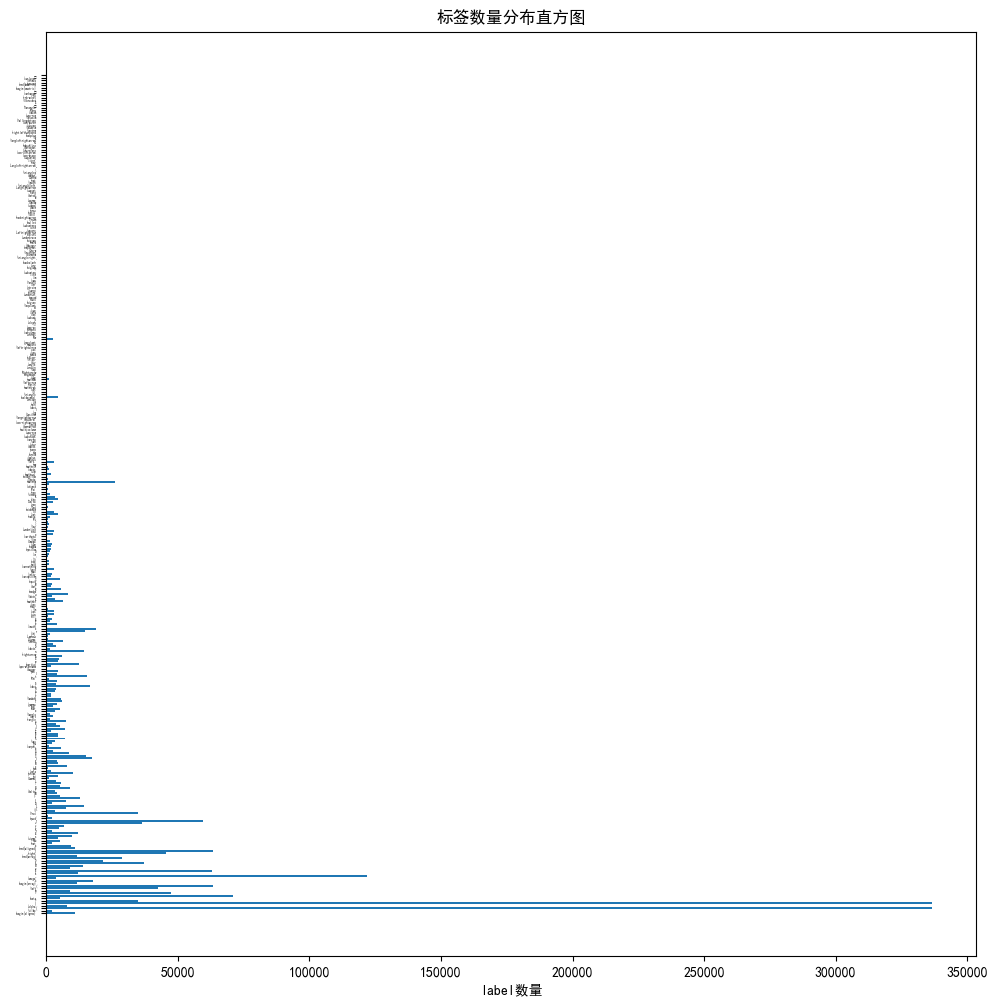

In [7]:
import matplotlib.pyplot as plt

lab_list = []
lab_dict = {}
with open("./icpr2024/img.txt", 'r', encoding="utf-8") as fp:
    for line in fp.readlines():
        label = line.strip().split('\t')[-1]
        lab_list.append(len(label.split(" ")))
        for key in label.split(" "):
            if key not in lab_dict.keys():
                lab_dict[key] = 1
            else:
                lab_dict[key] += 1

print("===================>标签长度参数：")
print("均值:", np.mean(lab_list))
print("中位数:", np.median(lab_list))
print("最大值:", np.max(lab_list))
print("最小值:", np.min(lab_list))

plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
fig = plt.figure(figsize=(12, 12))  # 设置画布大小
y = list(lab_dict.keys())
x = list(lab_dict.values())

plt.barh(y, x)
plt.tick_params(axis='y', labelsize=2)
plt.xlabel("label数量")
plt.title("标签数量分布直方图")
plt.show()

IntervalIndex([(0, 20], (20, 40], (40, 60], (60, 80], (80, 100] ... (940, 960], (960, 980], (980, 1000], (1000, 1020], (1020, 1040]],
              closed='right',
              dtype='interval[int64]')
[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020]


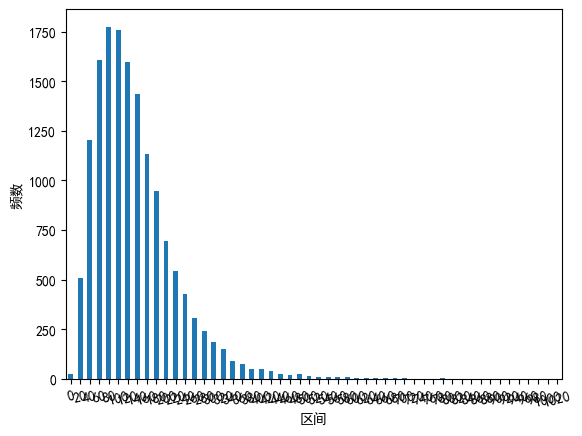

In [31]:
import pandas as pd
s = pd.cut(lab_list, bins=[x for x in range(0, 1050 + 1, 20)])

values = s.value_counts().values
print(s.categories)
labels = [i*20 for i in range((1050+1)//20)]
print(labels)
df = pd.DataFrame(values, index=labels)
df.plot(kind='bar', legend=False,)
plt.xticks(rotation=15)
plt.ylabel('频数')
plt.xlabel('区间')
plt.show()